In [21]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [39]:
# Path where the results are stored
RESULTS_PATH = '../../../results'

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

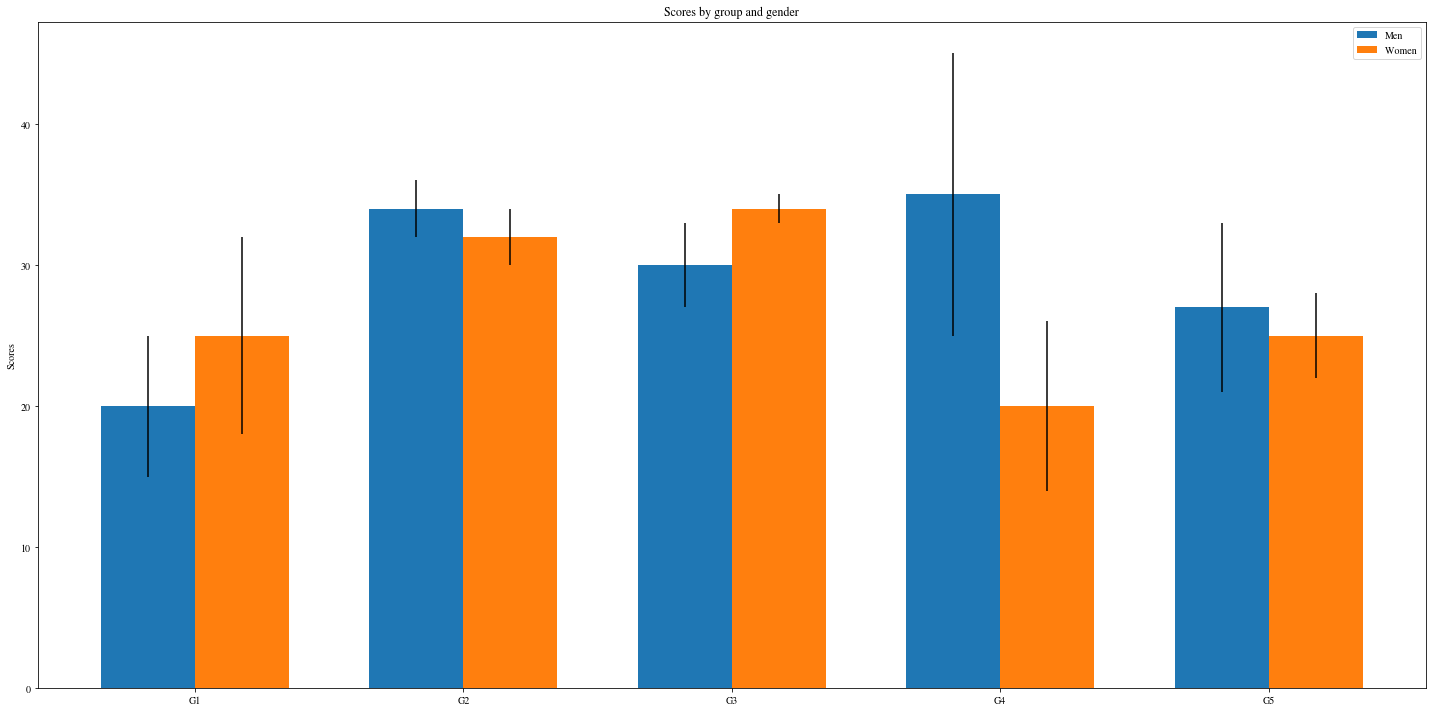

In [24]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [5, 2, 3, 10, 6]
women_std = [7, 2, 1, 6, 3]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, men_means, width, yerr=men_std, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, yerr=women_std, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

In [65]:
models = ['{} {} {}'.format(model, dataset, samples) for model in ['RF', 'XGB', 'KNN'] for samples in ['', 'with previous timesteps'] for dataset in ['all experiments', 'only wo skin']]
labels = ['{} F{}'.format(joint, force) for joint in ['HIP', 'KNEE', 'ANKLE'] for force in ['x', 'y']]
scores = ['MAE', 'MSE', 'R2']

In [67]:
results_excel = pd.read_excel(RESULTS_PATH + '/final_results.xlsx')
results_df = results_excel.iloc[:, 0:7]
results_df.columns = ['SCORE'] + [l.replace(' ', '_').upper() for l in labels]
results_df = results_df.dropna()
results_df = results_df.reset_index(drop=True)
results_df['MODEL'] = [model for model in models for s in scores] 
results_df

,SCORE,HIP_FX,HIP_FY,KNEE_FX,KNEE_FY,ANKLE_FX,ANKLE_FY,MODEL
0,MAE,8.8001 ± 2.1029,11.4433 ± 7.7425,7.9304 ± 2.5871,7.0257 ± 2.7806,3.5851 ± 0.2813,2.9905 ± 0.3252,RF all experiments
1,MSE,154.4415 ± 67.1123,603.6202 ± 564.7993,164.5952 ± 107.9920,119.2882 ± 72.6563,28.5209 ± 7.5418,19.6230 ± 6.5634,RF all experiments
2,R2,0.4526 ± 0.2488,0.1768 ± 0.1818,0.6919 ± 0.0701,0.5386 ± 0.1537,0.7625 ± 0.0731,0.6120 ± 0.0117,RF all experiments
3,MAE,7.3001 ± 0.4309,9.6592 ± 6.4626,5.9083 ± 1.8513,7.3614 ± 3.7981,3.7734 ± 0.0795,3.3837 ± 0.5167,RF only wo skin
4,MSE,99.7687 ± 22.1525,442.3694 ± 423.0300,73.9608 ± 40.8987,134.3254 ± 107.1454,27.6208 ± 0.9377,25.2174 ± 10.0133,RF only wo skin
5,R2,0.6982 ± 0.1102,0.4966 ± 0.0180,0.8212 ± 0.0750,0.6327 ± 0.1408,0.8421 ± 0.0032,0.3955 ± 0.2600,RF only wo skin
6,MAE,9.2864 ± 2.1067,11.5252 ± 7.6244,8.3906 ± 2.3871,8.0092 ± 3.3739,3.6636 ± 0.3494,3.1136 ± 0.4731,RF all experiments with previous timesteps
7,MSE,169.8119 ± 66.5766,583.6648 ± 541.4207,169.9792 ± 104.9718,144.5720 ± 92.1812,31.3977 ± 8.5677,22.0246 ± 8.7874,RF all experiments with previous timesteps
8,R2,0.3987 ± 0.2483,0.1671 ± 0.1349,0.6699 ± 0.0429,0.4605 ± 0.1779,0.7385 ± 0.0826,0.5741 ± 0.0444,RF all experiments with previous timesteps
9,MAE,7.6717 ± 0.6706,9.6595 ± 6.3608,6.1569 ± 2.6561,7.6654 ± 4.0669,4.0160 ± 0.2319,3.4169 ± 0.5336,RF only wo skin with previous timesteps


In [68]:
for col in [l.replace(' ', '_').upper() for l in labels]:
    results_df[col + '_MEAN'] = results_df[col].apply(lambda x: float(x.split(' ± ')[0]))    
    results_df[col + '_STD'] = results_df[col].apply(lambda x: float(x.split(' ± ')[1]))
    
results_df

,SCORE,HIP_FX,HIP_FY,KNEE_FX,KNEE_FY,ANKLE_FX,ANKLE_FY,MODEL,HIP_FX_MEAN,HIP_FX_STD,HIP_FY_MEAN,HIP_FY_STD,KNEE_FX_MEAN,KNEE_FX_STD,KNEE_FY_MEAN,KNEE_FY_STD,ANKLE_FX_MEAN,ANKLE_FX_STD,ANKLE_FY_MEAN,ANKLE_FY_STD
0,MAE,8.8001 ± 2.1029,11.4433 ± 7.7425,7.9304 ± 2.5871,7.0257 ± 2.7806,3.5851 ± 0.2813,2.9905 ± 0.3252,RF all experiments,8.8001,2.1029,11.4433,7.7425,7.9304,2.5871,7.0257,2.7806,3.5851,0.2813,2.9905,0.3252
1,MSE,154.4415 ± 67.1123,603.6202 ± 564.7993,164.5952 ± 107.9920,119.2882 ± 72.6563,28.5209 ± 7.5418,19.6230 ± 6.5634,RF all experiments,154.4415,67.1123,603.6202,564.7993,164.5952,107.9920,119.2882,72.6563,28.5209,7.5418,19.6230,6.5634
2,R2,0.4526 ± 0.2488,0.1768 ± 0.1818,0.6919 ± 0.0701,0.5386 ± 0.1537,0.7625 ± 0.0731,0.6120 ± 0.0117,RF all experiments,0.4526,0.2488,0.1768,0.1818,0.6919,0.0701,0.5386,0.1537,0.7625,0.0731,0.6120,0.0117
3,MAE,7.3001 ± 0.4309,9.6592 ± 6.4626,5.9083 ± 1.8513,7.3614 ± 3.7981,3.7734 ± 0.0795,3.3837 ± 0.5167,RF only wo skin,7.3001,0.4309,9.6592,6.4626,5.9083,1.8513,7.3614,3.7981,3.7734,0.0795,3.3837,0.5167
4,MSE,99.7687 ± 22.1525,442.3694 ± 423.0300,73.9608 ± 40.8987,134.3254 ± 107.1454,27.6208 ± 0.9377,25.2174 ± 10.0133,RF only wo skin,99.7687,22.1525,442.3694,423.0300,73.9608,40.8987,134.3254,107.1454,27.6208,0.9377,25.2174,10.0133
5,R2,0.6982 ± 0.1102,0.4966 ± 0.0180,0.8212 ± 0.0750,0.6327 ± 0.1408,0.8421 ± 0.0032,0.3955 ± 0.2600,RF only wo skin,0.6982,0.1102,0.4966,0.0180,0.8212,0.0750,0.6327,0.1408,0.8421,0.0032,0.3955,0.2600
6,MAE,9.2864 ± 2.1067,11.5252 ± 7.6244,8.3906 ± 2.3871,8.0092 ± 3.3739,3.6636 ± 0.3494,3.1136 ± 0.4731,RF all experiments with previous timesteps,9.2864,2.1067,11.5252,7.6244,8.3906,2.3871,8.0092,3.3739,3.6636,0.3494,3.1136,0.4731
7,MSE,169.8119 ± 66.5766,583.6648 ± 541.4207,169.9792 ± 104.9718,144.5720 ± 92.1812,31.3977 ± 8.5677,22.0246 ± 8.7874,RF all experiments with previous timesteps,169.8119,66.5766,583.6648,541.4207,169.9792,104.9718,144.5720,92.1812,31.3977,8.5677,22.0246,8.7874
8,R2,0.3987 ± 0.2483,0.1671 ± 0.1349,0.6699 ± 0.0429,0.4605 ± 0.1779,0.7385 ± 0.0826,0.5741 ± 0.0444,RF all experiments with previous timesteps,0.3987,0.2483,0.1671,0.1349,0.6699,0.0429,0.4605,0.1779,0.7385,0.0826,0.5741,0.0444
9,MAE,7.6717 ± 0.6706,9.6595 ± 6.3608,6.1569 ± 2.6561,7.6654 ± 4.0669,4.0160 ± 0.2319,3.4169 ± 0.5336,RF only wo skin with previous timesteps,7.6717,0.6706,9.6595,6.3608,6.1569,2.6561,7.6654,4.0669,4.0160,0.2319,3.4169,0.5336


In [90]:
results_df.loc[(results_df['SCORE'] == 'MAE') & (results_df['MODEL'] == 'RF all experiments')]

,SCORE,HIP_FX,HIP_FY,KNEE_FX,KNEE_FY,ANKLE_FX,ANKLE_FY,MODEL,HIP_FX_MEAN,HIP_FX_STD,HIP_FY_MEAN,HIP_FY_STD,KNEE_FX_MEAN,KNEE_FX_STD,KNEE_FY_MEAN,KNEE_FY_STD,ANKLE_FX_MEAN,ANKLE_FX_STD,ANKLE_FY_MEAN,ANKLE_FY_STD
0,MAE,8.8001 ± 2.1029,11.4433 ± 7.7425,7.9304 ± 2.5871,7.0257 ± 2.7806,3.5851 ± 0.2813,2.9905 ± 0.3252,RF all experiments,8.8001,2.1029,11.4433,7.7425,7.9304,2.5871,7.0257,2.7806,3.5851,0.2813,2.9905,0.3252
3,MAE,7.3001 ± 0.4309,9.6592 ± 6.4626,5.9083 ± 1.8513,7.3614 ± 3.7981,3.7734 ± 0.0795,3.3837 ± 0.5167,RF only wo skin,7.3001,0.4309,9.6592,6.4626,5.9083,1.8513,7.3614,3.7981,3.7734,0.0795,3.3837,0.5167
6,MAE,9.2864 ± 2.1067,11.5252 ± 7.6244,8.3906 ± 2.3871,8.0092 ± 3.3739,3.6636 ± 0.3494,3.1136 ± 0.4731,RF all experiments with previous timesteps,9.2864,2.1067,11.5252,7.6244,8.3906,2.3871,8.0092,3.3739,3.6636,0.3494,3.1136,0.4731
9,MAE,7.6717 ± 0.6706,9.6595 ± 6.3608,6.1569 ± 2.6561,7.6654 ± 4.0669,4.0160 ± 0.2319,3.4169 ± 0.5336,RF only wo skin with previous timesteps,7.6717,0.6706,9.6595,6.3608,6.1569,2.6561,7.6654,4.0669,4.0160,0.2319,3.4169,0.5336
12,MAE,7.6554 ± 2.5368,11.8617 ± 8.1931,8.4630 ± 2.4550,7.3072 ± 2.7675,3.2641 ± 0.3853,2.7437 ± 0.3309,XGB all experiments,7.6554,2.5368,11.8617,8.1931,8.4630,2.4550,7.3072,2.7675,3.2641,0.3853,2.7437,0.3309
15,MAE,5.8537 ± 0.5953,9.6492 ± 6.9066,6.1149 ± 1.8363,7.2880 ± 3.8058,3.5652 ± 0.1907,3.1199 ± 0.2599,XGB only wo skin,5.8537,0.5953,9.6492,6.9066,6.1149,1.8363,7.2880,3.8058,3.5652,0.1907,3.1199,0.2599
18,MAE,8.0144 ± 2.3092,12.1426 ± 8.2638,8.6996 ± 2.3239,7.1720 ± 2.9488,3.4218 ± 0.4042,2.7967 ± 0.3194,XGB all experiments with previous timesteps,8.0144,2.3092,12.1426,8.2638,8.6996,2.3239,7.1720,2.9488,3.4218,0.4042,2.7967,0.3194
21,MAE,6.2563 ± 0.5546,10.4789 ± 7.3880,6.2144 ± 1.9552,7.6696 ± 3.8910,3.8364 ± 0.3769,3.0953 ± 0.0272,XGB only wo skin with previous timesteps,6.2563,0.5546,10.4789,7.3880,6.2144,1.9552,7.6696,3.8910,3.8364,0.3769,3.0953,0.0272
24,MAE,9.2759 ± 2.6061,13.0549 ± 9.1347,8.3359 ± 2.6880,7.5331 ± 3.0887,3.7633 ± 0.2708,3.0318 ± 0.4057,KNN all experiments,9.2759,2.6061,13.0549,9.1347,8.3359,2.6880,7.5331,3.0887,3.7633,0.2708,3.0318,0.4057
27,MAE,7.6622 ± 0.5080,10.8107 ± 7.2735,6.1655 ± 1.9536,7.7291 ± 4.1446,3.7907 ± 0.2657,3.4332 ± 0.5852,KNN only wo skin,7.6622,0.5080,10.8107,7.2735,6.1655,1.9536,7.7291,4.1446,3.7907,0.2657,3.4332,0.5852


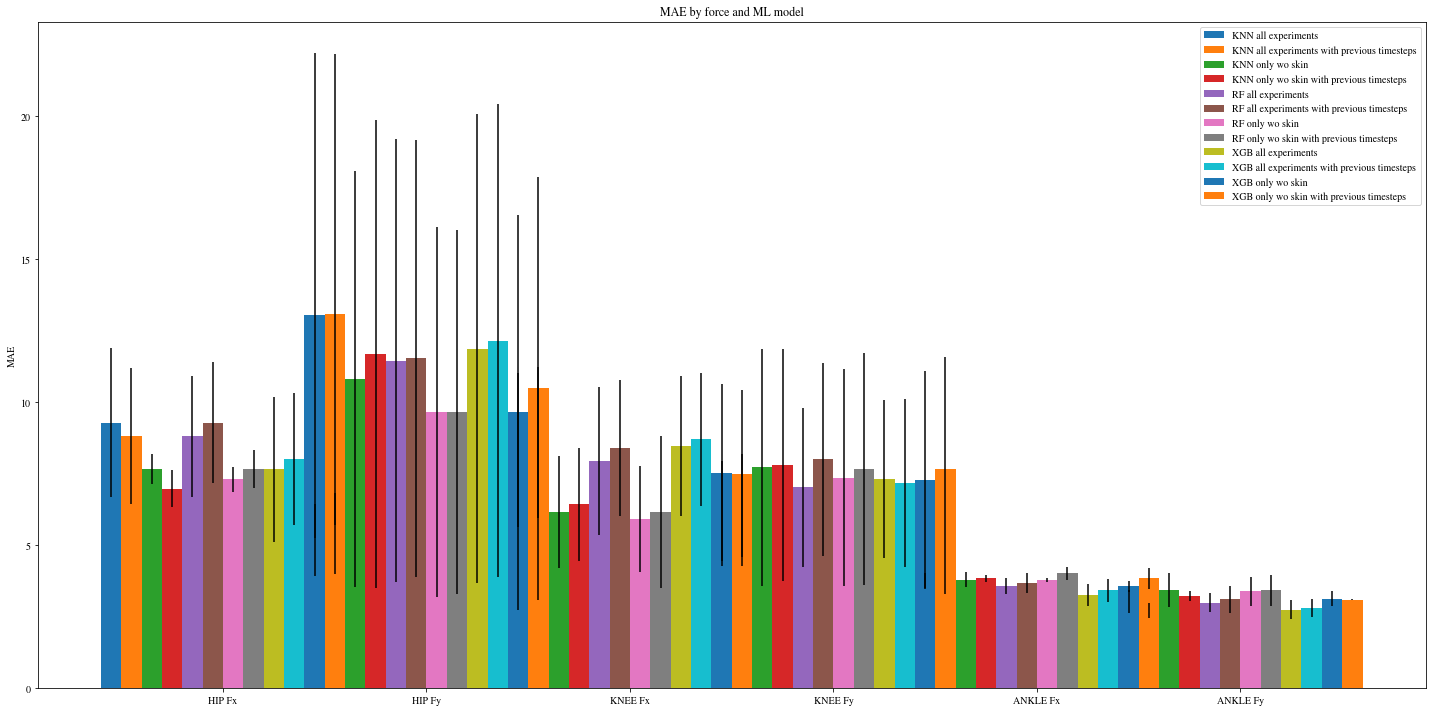

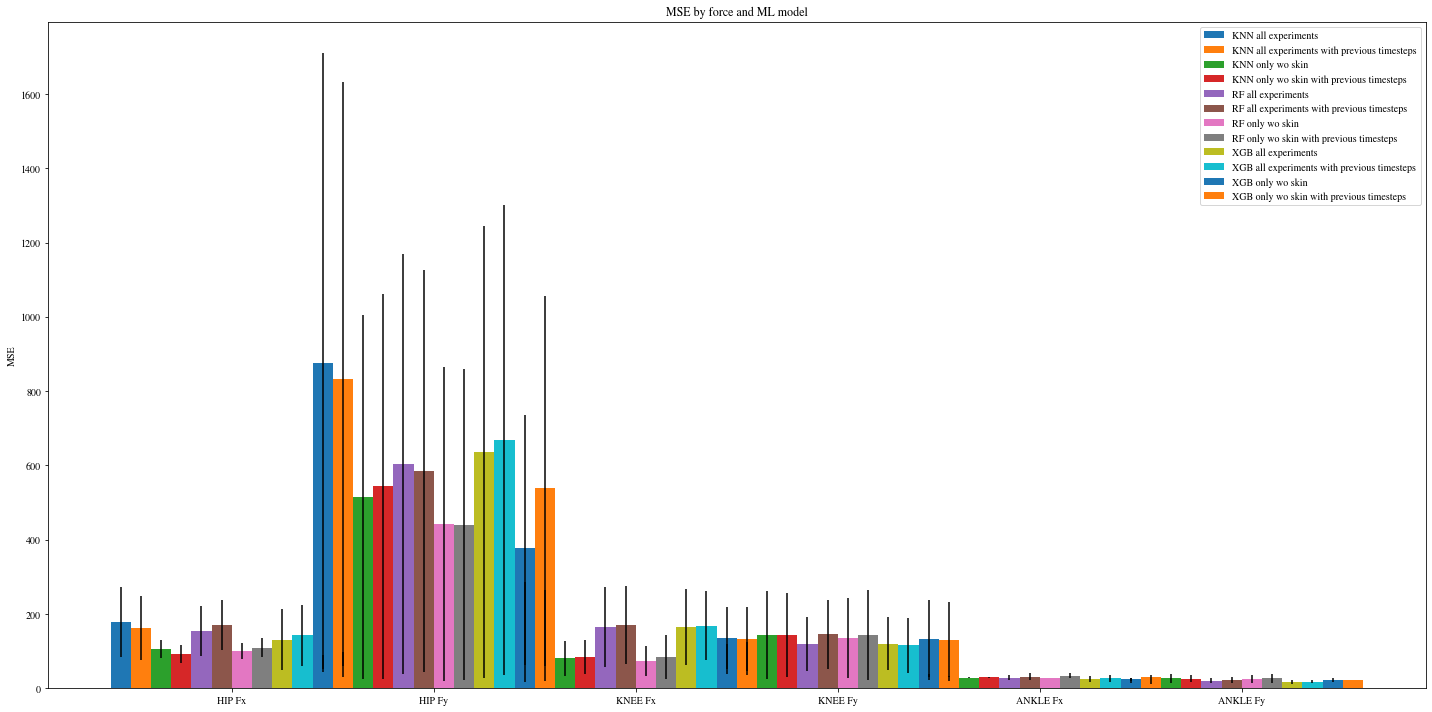

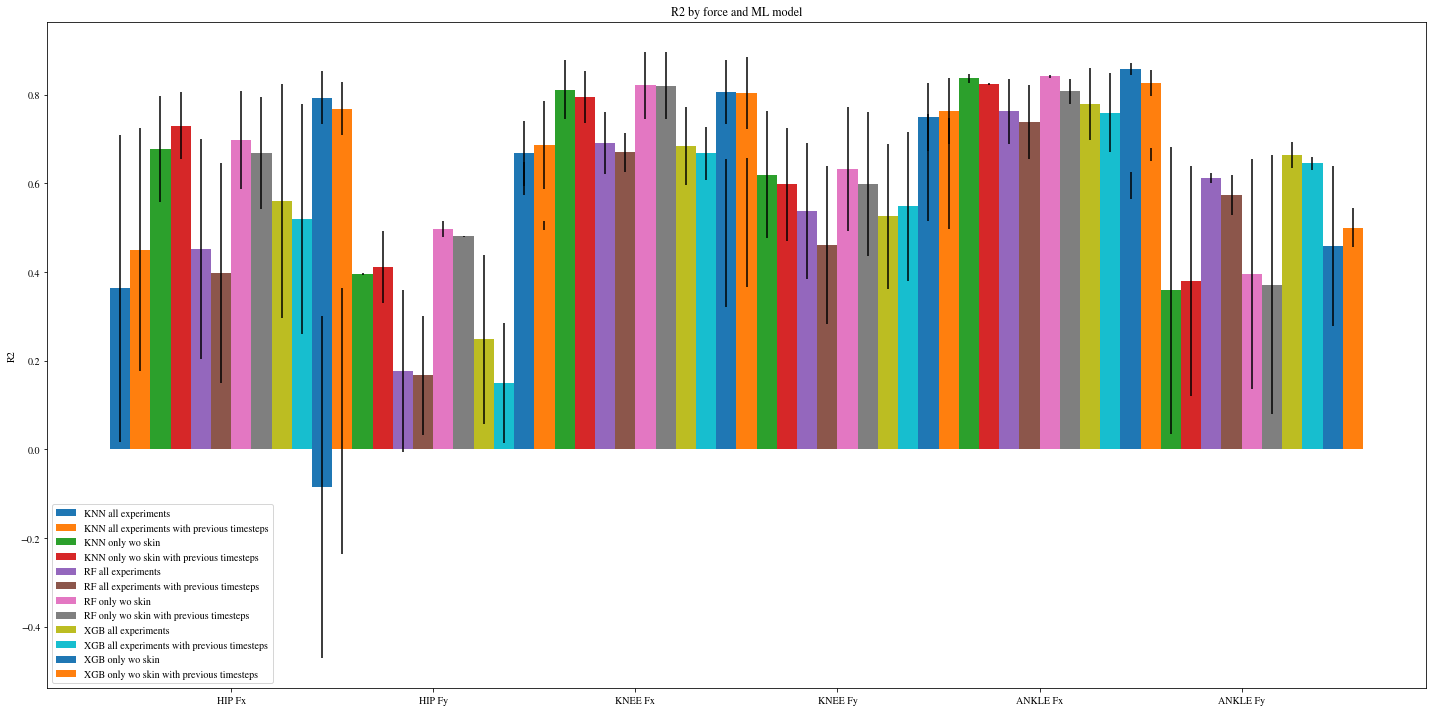

In [146]:
colors = ['red', 'lightcoral', 'darkred', 'darksalmon', 'green', 'lightgreen', 'darkgreen', 'darkolivegreen', 'blue', 'lightblue', 'darkblue', 'slategray']#, 'purple', 'violet', 'deeppink', 'pink']
width = 0.1  # the width of the bars

x = np.arange(len(labels))  # the label locations
n_models = len(models)
x_models = [-(width*i) + (width/2) for i in range(int(n_models/2), 0, -1)] + [(width*i) - (width/2) for i in range(1, int(n_models/2) + 1, 1)]

assert(len(models) == len(colors))
assert(len(models) == len(x_models))

for score, score_group in results_df.groupby(['SCORE']):
    
    fig, ax = plt.subplots(figsize=(20,10))
    for i, (model, model_group) in enumerate(score_group.groupby(['MODEL'])):
        
        mean_ls = model_group[[l.replace(' ', '_').upper() + '_MEAN' for l in labels]].values[0]
        std_ls = model_group[[l.replace(' ', '_').upper() + '_STD' for l in labels]].values[0]
        assert(len(labels) == len(mean_ls))
        assert(len(labels) == len(std_ls))
    
        rects1 = ax.bar(x + x_models[i], mean_ls, width, yerr=std_ls, label=model)#, color=colors)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(score)
    ax.set_title('{} by force and ML model'.format(score))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    plt.show()

In [144]:
[-(width*i) + (width/2) for i in range(int(n_models/2), 0, -1)]

[-0.55,
 -0.45,
 -0.35000000000000003,
 -0.25000000000000006,
 -0.15000000000000002,
 -0.05]

In [145]:
[(width*i) - (width/2) for i in range(1, int(n_models/2) + 1, 1)]

[0.05,
 0.15000000000000002,
 0.25000000000000006,
 0.35000000000000003,
 0.45,
 0.55]